In [2]:
import tensorflow as tf
import numpy as np

In [15]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
mean = np.mean(train_images, axis=(0, 1, 2))
std = np.std(train_images, axis=(0, 1, 2))
train_images = (train_images - mean) / std
test_images = (test_images - mean) / std


test_data = tf.data.Dataset.from_tensor_slices((test_images, np.array(test_labels == np.arange(10), np.float32)))
test_data = test_data.batch(128).prefetch(tf.data.AUTOTUNE)
len_train = 4000
train_data = tf.data.Dataset.from_tensor_slices((train_images[:len_train], np.array(train_labels[:len_train] == np.arange(10), np.float32)))
train_data = train_data.batch(128).prefetch(tf.data.AUTOTUNE)

In [4]:
!ls checkpoints/resnet18

checkpoint  ckpt-8.data-00000-of-00001	ckpt-8.index  train_frac_0.08


In [19]:
import argparse
import train
import importlib
importlib.reload(train)

from train import Model
model_type = 'resnet18'
model = Model(model_type, 10)


In [20]:
ckpt_path = f'./checkpoints/{model_type}/train_frac_{0.08}'
model.load_model_from_ckpt(ckpt_path)

==> Loading from checkpoint... ./checkpoints/resnet18/train_frac_0.08


In [22]:
model.run_test(test_data)

Prediction Accuracy: 70.26%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

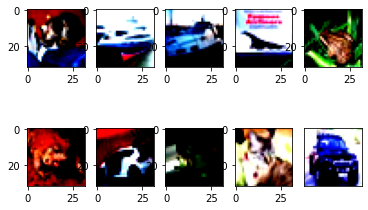

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,5)
for i in range(10):
    ax[i//5, i%5].imshow(test_images[i])
    plt.xticks([])
    plt.yticks([])
# test_images[:10].min(), test_images[:10].max()
